# Predict New York Rent Price dataset by implementing Gradient Boosting for MSE 

Gradient boosting is a machine learning technique used in regression and classification tasks. It gives a prediction model in the form of **an ensemble of weak prediction models**, which are typically decision trees. When a decision tree is the weak learner, the resulting algorithm is called **gradient-boosted trees**; it usually outperforms random forest. A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function. Here, I use MSE as the loss function.

When using gradient boosting, too few iterations leads to an under-fit model and too many iterations leads to an over-fit one. Before we make predictions, it is helpful to see how the training mean square error evolves with more boosting iterations, so we can try and fit a well calibrated model.

In [3]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from pathlib import Path
from gradient_boosting_mse_code import *
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### Write a program from scratch implementing gradient boosting with MSE.

<img src="Gradient_Boosting_MSE.png" width="550">

In [4]:
def load_dataset(path="data/rent-ideal.csv"):
    dataset = np.loadtxt(path, delimiter=",", skiprows=1)
    y = dataset[:, -1]
    X = dataset[:, 0:- 1]
    return X, y

def gradient_boosting_mse(X, y, num_iter, max_depth=1, nu=0.1):
    """Given X, a array y and num_iter return y_mean and trees 
   
    Input: X, y, num_iter
           max_depth
           nu (is the shinkage)
    Outputs:y_mean, array of trees from DecisionTreeRegression
    """
    trees = []
    N, _ = X.shape
    y_mean = np.mean(y)
    fm = y_mean
    y_pred = np.ones(len(X))*fm
    for i in range(num_iter):
        res = y - y_pred
        clf = DecisionTreeRegressor(max_depth=max_depth)
        clf.fit(X,res)
        y_pred += nu * clf.predict(X)
        trees.append(clf)
    return y_mean, trees  

def gradient_boosting_predict(X, trees, y_mean, nu=0.1):
    """Given X, trees, y_mean predict y_hat
    """
    y_pred = np.ones(len(X))*y_mean
    for tree in trees:
        y_pred += nu * tree.predict(X)
    return y_pred


### Task1

Fix the Shrinkage to 0.1. Apply gradient boosting to New York rent price dataset using different values for the number of trees numTrees. And find the best value for numTrees. Report train and validation R2 for the best value of numTrees. Make a plot that shows the experiment (training and validation metric as a function of the number of trees). Try as least 2000 trees.

In [5]:
X, y = load_dataset(path='data/rent-ideal.csv')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=3)

In [6]:
numTrees = np.arange(100,3050,100)
numTrees

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,
       2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000])

In [8]:
results = []
for tree in numTrees:
    y_mean, trees = gradient_boosting_mse(X_train, y_train, tree, max_depth=7,nu=0.1)
    y_hat_train = gradient_boosting_predict(X_train, trees, y_mean, nu=0.1)
    y_hat = gradient_boosting_predict(X_val, trees, y_mean, nu=0.1) 
    results.append([tree,r2_score(y_train, y_hat_train), r2_score(y_val, y_hat)])

In [83]:
df = pd.DataFrame(results, columns = ['numTree','r_square(train)','r_square(valid)'])

In [84]:
df 

,numTree,r_square(train),r_square(valid)
0,100,0.840137,0.800132
1,200,0.878787,0.826949
2,300,0.899262,0.839892
3,400,0.911166,0.846238
4,500,0.921050,0.850707
5,600,0.928792,0.854662
6,700,0.933990,0.856851
7,800,0.938413,0.858853
8,900,0.941411,0.859761
9,1000,0.943810,0.859727


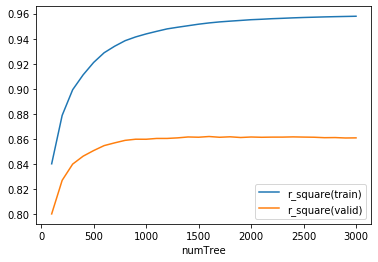

In [97]:
fig, ax = plt.subplots()
ax.plot(df['numTree'], df['r_square(train)'],label = 'r_square(train)')
ax.plot(df['numTree'], df['r_square(valid)'],label = 'r_square(valid)')
plt.legend()
plt.xlabel('numTree')
plt.show()

- Find the best value for numTrees?
    - As the number of numTree increases, both the train and test r-square increase. Therefore, the best value for numTrees is as big as possible.


- Report train and validation R2 for the best value of numTrees.
    - Train R2 for the best value of numTrees: 0.957925, Validation R2 for the best value of numTrees: 0.860836

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from pathlib import Path
from gradient_boosting_mse import *
from adaboost import *
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor

### Task2

Compare the Gradient Boosting for MSE results with the results of running the gradient boosting package (XGBoost). Explore the hyper parameters given in the package. Make plots or tables that show the result of the experiments.

In [2]:
X, y = load_dataset(path='data/rent-ideal.csv')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=3)

In [3]:
numTrees = np.arange(100,3050,100)
numTrees

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,
       2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000])

In [7]:
results = []
for tree in numTrees:
    model = XGBRegressor(n_estimators = tree, max_depth = 7, learning_rate=0.1, random_state=3, nthread = -1)
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_val = model.predict(X_val)
    results.append([tree,r2_score(y_train, y_hat_train), r2_score(y_val, y_hat_val)])

In [8]:
df = pd.DataFrame(results, columns = ['numTree','r_square(train)','r_square(valid)'])

In [10]:
df

,numTree,r_square(train),r_square(valid)
0,100,0.832053,0.794689
1,200,0.867922,0.821065
2,300,0.888952,0.835008
3,400,0.902424,0.842882
4,500,0.912225,0.848127
5,600,0.919612,0.851829
6,700,0.925229,0.854663
7,800,0.929962,0.856578
8,900,0.933233,0.857798
9,1000,0.936105,0.858708


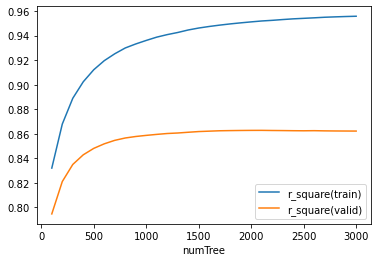

In [11]:
fig, ax = plt.subplots()
ax.plot(df['numTree'], df['r_square(train)'],label = 'r_square(train)')
ax.plot(df['numTree'], df['r_square(valid)'],label = 'r_square(valid)')
plt.legend()
plt.xlabel('numTree')
plt.show()

Compare the result with 3.2 using gradient boost mse, both the r-square for train and validation set don't change that much. They are almost same. The best train R2 for the best value of numTrees is 0.955591 and the best validation R2 for the best value of numTrees is 0.862259, with 2900 trees. 